In [4]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from scipy.stats import linregress
from sklearn import datasets
import sklearn.datasets as dta
import scipy.stats as st

In [2]:
# importing CSV to select random movies from 2015 and 2016
movie_data = "movie_metadata.csv"
movie_data = pd.read_csv('movie_metadata.csv')
pd.set_option('display.max_columns', 30)

movie_data.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# dropping NaN 
movie_data_na = movie_data.dropna()

movie_data_na


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [4]:
movie_data_na = movie_data_na.reset_index()


movie_data_na

,index,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
3752,5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
3753,5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3754,5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [5]:
#resetting columns to only show movie titles and release year

movie_data_na = movie_data_na.loc[:,["movie_title" , "title_year" , "movie_facebook_likes"]]

movie_data_na

,movie_title,title_year,movie_facebook_likes
0,Avatar,2009.0,33000
1,Pirates of the Caribbean: At World's End,2007.0,0
2,Spectre,2015.0,85000
3,The Dark Knight Rises,2012.0,164000
4,John Carter,2012.0,24000
...,...,...,...
3751,Clean,2004.0,171
3752,The Circle,2000.0,697
3753,Primer,2004.0,19000
3754,El Mariachi,1992.0,0


In [6]:
#Renaming columns to remove underscores and remove decimal points
movie_data_titles_year = movie_data_na.rename(columns={"movie_title" : "Title",
                                                 "title_year" : "Release Year",
                                                  "movie_facebook_likes" : "Facebook Likes"     
                                                })


movie_data_titles_year




,Title,Release Year,Facebook Likes
0,Avatar,2009.0,33000
1,Pirates of the Caribbean: At World's End,2007.0,0
2,Spectre,2015.0,85000
3,The Dark Knight Rises,2012.0,164000
4,John Carter,2012.0,24000
...,...,...,...
3751,Clean,2004.0,171
3752,The Circle,2000.0,697
3753,Primer,2004.0,19000
3754,El Mariachi,1992.0,0


In [7]:
#Selecting movies from 2015 and 2016 and reset column
movies_2015 = movie_data_titles_year.loc[(movie_data_titles_year['Release Year'] == 2015.0)]
movies_2015.head()


,Title,Release Year,Facebook Likes
2,Spectre,2015.0,85000
7,Avengers: Age of Ultron,2015.0,118000
28,Jurassic World,2015.0,150000
44,Furious 7,2015.0,94000
60,Jupiter Ascending,2015.0,44000


In [8]:
movies_2016 = movie_data_titles_year.loc[(movie_data_titles_year['Release Year'] == 2016.0)]
movies_2016.head()

,Title,Release Year,Facebook Likes
9,Batman v Superman: Dawn of Justice,2016.0,197000
26,Captain America: Civil War,2016.0,72000
55,Star Trek Beyond,2016.0,30000
61,The Legend of Tarzan,2016.0,29000
63,X-Men: Apocalypse,2016.0,54000


In [9]:
#selecting random movies from 2015 list
movie_rand_2015 = movies_2015.sample(n=10, random_state=3)
movie_rand_2015

,Title,Release Year,Facebook Likes
641,Focus,2015.0,23000
104,Terminator Genisys,2015.0,82000
3266,Pan,2015.0,24000
606,Ted 2,2015.0,30000
76,Inside Out,2015.0,118000
775,Goosebumps,2015.0,35000
2386,Aloha,2015.0,11000
3401,Cinderella,2015.0,56000
1731,Self/less,2015.0,11000
1318,Ip Man 3,2015.0,12000


In [10]:
#selecting random movies from 2016 list
movie_rand_2016 = movies_2016.sample(n=10,random_state=24)
movie_rand_2016

,Title,Release Year,Facebook Likes
919,13 Hours,2016.0,44000
1483,Ghostbusters,2016.0,62000
2194,My Big Fat Greek Wedding 2,2016.0,19000
158,Gods of Egypt,2016.0,24000
1902,Eddie the Eagle,2016.0,15000
55,Star Trek Beyond,2016.0,30000
726,London Has Fallen,2016.0,28000
1288,The 5th Wave,2016.0,14000
71,Suicide Squad,2016.0,80000
2010,Me Before You,2016.0,51000


In [11]:
#merging lists
merged_movie_list = pd.merge(movie_rand_2015, movie_rand_2016,  how="outer")
merged_movie_list.round()
confirmed_movie_list = [title.replace('\xa0','') for title in list(merged_movie_list['Title'])]
confirmed_movie_list

['Focus',
 'Terminator Genisys',
 'Pan',
 'Ted 2',
 'Inside Out',
 'Goosebumps',
 'Aloha',
 'Cinderella',
 'Self/less',
 'Ip Man 3',
 '13 Hours',
 'Ghostbusters',
 'My Big Fat Greek Wedding 2',
 'Gods of Egypt',
 'Eddie the Eagle',
 'Star Trek Beyond',
 'London Has Fallen',
 'The 5th Wave',
 'Suicide Squad',
 'Me Before You']

In [12]:

#titles_test =  #["Focus", "Termintor Genisys" , "Pan" , "Ted 2" , "Inside Out" , 
                       #"Goosebumps" , "Aloha" , "Cinderella" , "Self/less" , "Ip Man 3" , "13 Hours",
                       #"Ghostbusters" , "My Big Fat Greek Wedding 2" , "Gods of Egypt" , "Eddie the Eagle" , 
                       #56,48]

query_url =  "http://www.omdbapi.com/?apikey=e0ca3f65&t="


titles = []
viewCount = []

for title in confirmed_movie_list:
    title2 = title.replace(" ","+")
    target_url = query_url + title2
    
    
    response = requests.get(target_url).json()
    ratings = response['Ratings'] # because response is a dict
    print(title)
    for rating in ratings: # ratomgs is a list
        print(rating)
        #rating is a dictionay
        for key,value in rating.items():
            print(f'key: {key}, value: {value}')
    print("---------------------------------------------")
    #titles.append(response[0]['name'])
    #ratings.append(response[0]['statistics']['viewCount'])
    #print(ratings)
    
    

Focus
{'Source': 'Internet Movie Database', 'Value': '6.6/10'}
key: Source, value: Internet Movie Database
key: Value, value: 6.6/10
{'Source': 'Rotten Tomatoes', 'Value': '56%'}
key: Source, value: Rotten Tomatoes
key: Value, value: 56%
{'Source': 'Metacritic', 'Value': '56/100'}
key: Source, value: Metacritic
key: Value, value: 56/100
---------------------------------------------
Terminator Genisys
{'Source': 'Internet Movie Database', 'Value': '6.4/10'}
key: Source, value: Internet Movie Database
key: Value, value: 6.4/10
{'Source': 'Rotten Tomatoes', 'Value': '26%'}
key: Source, value: Rotten Tomatoes
key: Value, value: 26%
{'Source': 'Metacritic', 'Value': '38/100'}
key: Source, value: Metacritic
key: Value, value: 38/100
---------------------------------------------
Pan
{'Source': 'Internet Movie Database', 'Value': '5.7/10'}
key: Source, value: Internet Movie Database
key: Value, value: 5.7/10
{'Source': 'Rotten Tomatoes', 'Value': '27%'}
key: Source, value: Rotten Tomatoes
key:

In [11]:
# Import Dependencies
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Creating dataframe of movie and ratings

# Initialize data of lists based on previous data extraction
movie_data = {'Movie Name' : ['Focus', 'Termintor Genisys', 'Pan', 'Ted 2', 'Inside Out',
'Goosebumps', 'Aloha', 'Cinderella', 'Self/less', 'Ip Man 3', '13 Hours',
'Ghostbusters', 'My Big Fat Greek Wedding 2', 'Gods of Egypt', 'Eddie the Eagle',
'Star Trek Beyond', 'London Has Fallen', 'The 5th Wave', 'Suicide Squad', 'Me Before You'],
'IMDB Rating' : [66, 64, 57, 63, 82, 63, 54, 69, 65, 71, 73, 78, 60, 54, 74, 71, 59, 52, 60, 74],
'Rotten Tomatoes Rating' : [56, 26, 27, 45, 98, 78, 20, 85, 19, 78, 51, 97, 28, 16, 82, 86, 26, 15, 27, 55],
'Metacritic Rating' : [56, 38, 36, 48, 94, 60, 40, 67, 34, 57, 48, 71, 37, 25, 54, 68, 28, 33, 40, 51],
'Facebook Likes' : [23000, 82000, 24000, 30000, 118000, 35000, 11000, 56000, 11000, 12000, 44000, 62000, 19000, 24000, 15000, 30000, 28000, 14000, 80000, 51000]}


In [6]:
# Create the DataFrame
master_movie_df = pd.DataFrame(movie_data)

# Print DataFrame
master_movie_df

,Movie Name,IMDB Rating,Rotten Tomatoes Rating,Metacritic Rating,Facebook Likes
0,Focus,66,56,56,23000
1,Termintor Genisys,64,26,38,82000
2,Pan,57,27,36,24000
3,Ted 2,63,45,48,30000
4,Inside Out,82,98,94,118000
5,Goosebumps,63,78,60,35000
6,Aloha,54,20,40,11000
7,Cinderella,69,85,67,56000
8,Self/less,65,19,34,11000
9,Ip Man 3,71,78,57,12000


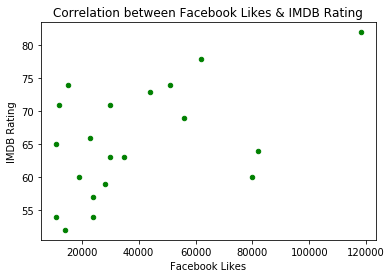

In [8]:
# Generate a scatter plot comparing facebook likes to IMDB rating
master_movie_df.plot(kind='scatter',x='Facebook Likes',y='IMDB Rating',color='green')
plt.title("Correlation between Facebook Likes & IMDB Rating")

plt.show()

In [21]:
# Calculate the correlation coefficient between Facebook Likes and IMDB Rating:

print("The correlation coefficient between Facebook Likes and IMDB Rating is:")
print(st.pearsonr(master_movie_df["Facebook Likes"],master_movie_df["IMDB Rating"]))

The correlation coefficient between Facebook Likes and IMDB Rating is:
(0.497330932313517, 0.025674406889153133)


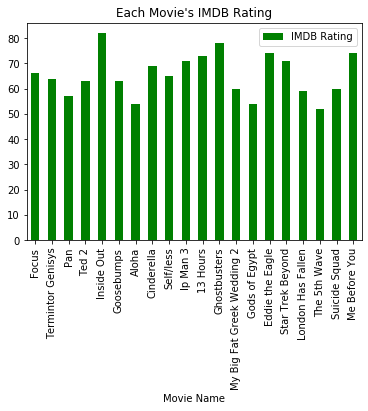

In [76]:
# Generate a bar chart displaying each movie's facebook likes & IMDB rating
master_movie_df.plot(kind='Bar',x='Movie Name',y='IMDB Rating',color='green')
plt.title("Each Movie's IMDB Rating")
ax.set_ylabel('IMDB Rating')

plt.show()

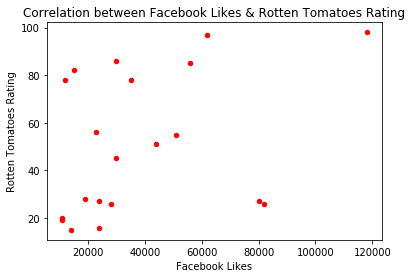

In [55]:
# Generate a scatter plot comparing facebook likes to Rotten Tomatoes rating
master_movie_df.plot(kind='scatter',x='Facebook Likes',y='Rotten Tomatoes Rating',color='red')
plt.title("Correlation between Facebook Likes & Rotten Tomatoes Rating")

plt.show()

In [22]:
# Calculate the correlation coefficient between Facebook Likes and Rotten Tomatoes Rating:

print("The correlation coefficient between Facebook Likes and Rotten Tomatoes Rating is:")
print(st.pearsonr(master_movie_df["Facebook Likes"],master_movie_df["Rotten Tomatoes Rating"]))

The correlation coefficient between Facebook Likes and Rotten Tomatoes Rating is:
(0.3530141693247736, 0.12683124459189213)


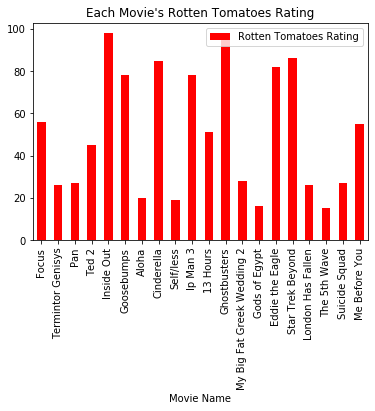

In [67]:
# Generate a bar chart displaying each movie's facebook likes & Rotten Tomatoes rating
master_movie_df.plot(kind='Bar',x='Movie Name',y='Rotten Tomatoes Rating',color='red')
plt.title("Each Movie's Rotten Tomatoes Rating")
ax.set_ylabel('Rotten Tomatoes Rating')
plt.legend(loc='best')
plt.show()

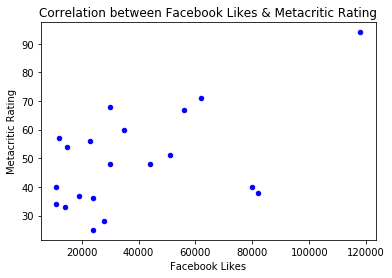

In [57]:
# Generate a scatter plot comparing facebook likes to Metacritic rating
master_movie_df.plot(kind='scatter',x='Facebook Likes',y='Metacritic Rating',color='blue')
plt.title("Correlation between Facebook Likes & Metacritic Rating")

plt.show()

In [23]:
# Calculate the correlation coefficient between Facebook Likes and Metacritic Rating:

print("The correlation coefficient between Facebook Likes and Metacritic Rating is:")
print(st.pearsonr(master_movie_df["Facebook Likes"],master_movie_df["Metacritic Rating"]))

The correlation coefficient between Facebook Likes and Metacritic Rating is:
(0.5353342407644144, 0.014998049265849104)


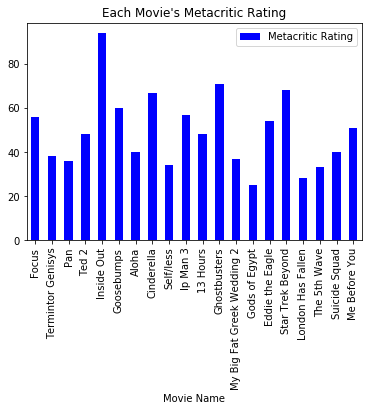

In [58]:
# Generate a bar chart displaying each movie's facebook likes & Metacritic rating
master_movie_df.plot(kind='Bar',x='Movie Name',y='Metacritic Rating',color='blue')
plt.title("Each Movie's Metacritic Rating")
ax.set_ylabel('Metacritic Rating')

plt.show()

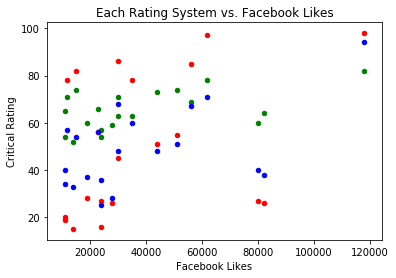

In [66]:
# gca stands for 'get current axis'
ax = plt.gca()

master_movie_df.plot(kind='scatter',x='Facebook Likes',y='IMDB Rating', color='green', ax=ax)
master_movie_df.plot(kind='scatter',x='Facebook Likes',y='Rotten Tomatoes Rating', color='red', ax=ax)
master_movie_df.plot(kind='scatter',x='Facebook Likes',y='Metacritic Rating', color='blue', ax=ax)

plt.title("Each Rating System vs. Facebook Likes")
ax.set_ylabel('Critical Rating')

plt.show()